In [1]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 129.3 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="Ly77lYwiNcROvraELT76")

project = rf.workspace("khoaluan-nlzdl").project("obj-detection-watermelon")
dataset = project.version(2).download("yolov8")

print("Dataset path:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Obj-detection-watermelon-2 in yolov8:: 100%|██████████| 1536/1536 [00:00<00:00, 7017.13it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset path: /content/Obj-detection-watermelon-2


In [4]:
import os
import random
import shutil

# ================== CẤU HÌNH ==================
DATASET_DIR = "/content/Obj-detection-watermelon-2/train"
IMG_DIR = os.path.join(DATASET_DIR, "images")
LABEL_DIR = os.path.join(DATASET_DIR, "labels")

OUTPUT_DIR = "dataset_split"

TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1

random.seed(42)
# ==============================================

# Lấy danh sách ảnh
images = [f for f in os.listdir(IMG_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(images)

# Tính số lượng
total = len(images)
train_end = int(total * TRAIN_RATIO)
val_end = train_end + int(total * VAL_RATIO)

train_imgs = images[:train_end]
val_imgs = images[train_end:val_end]
test_imgs = images[val_end:]

# Hàm tạo thư mục + copy
def copy_files(image_list, split_name):
    img_out = os.path.join(OUTPUT_DIR, split_name, "images")
    label_out = os.path.join(OUTPUT_DIR, split_name, "labels")

    os.makedirs(img_out, exist_ok=True)
    os.makedirs(label_out, exist_ok=True)

    for img in image_list:
        label = os.path.splitext(img)[0] + ".txt"

        shutil.copy(
            os.path.join(IMG_DIR, img),
            os.path.join(img_out, img)
        )

        shutil.copy(
            os.path.join(LABEL_DIR, label),
            os.path.join(label_out, label)
        )

# Thực hiện chia
copy_files(train_imgs, "train")
copy_files(val_imgs, "valid")
copy_files(test_imgs, "test")

print("Chia dataset xong!")
print(f"Train: {len(train_imgs)} | Valid: {len(val_imgs)} | Test: {len(test_imgs)}")


Chia dataset xong!
Train: 535 | Valid: 153 | Test: 77


In [8]:
import yaml

data = {
    "path": "dataset_split",
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "nc": 4,
    "names": [
        "Anthracnose",
        "DownyMildew",
        "Healthy",
        "MosaicVirus"
    ]
}

with open("dataset_split/data.yaml", "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("Tạo data.yaml thành công")

Tạo data.yaml thành công


In [7]:
!pip install -q ultralytics

In [10]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
        data='dataset_split/data.yaml',
        imgsz=640,
        epochs=50,
        batch=32,
        device=0
    )

Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_split/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a48ee7c6d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

✅ Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


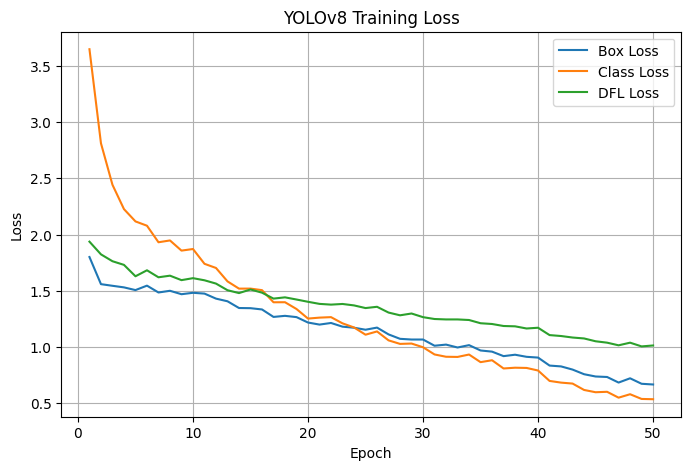

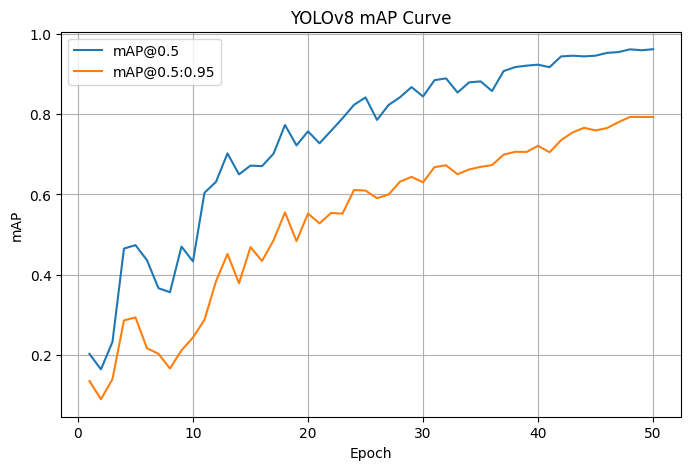

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_PATH = "/content/runs/detect/train/results.csv"

def load_results(path):
    df = pd.read_csv(path)
    print("✅ Columns:", df.columns.tolist())
    return df


def plot_training_loss(df):
    plt.figure(figsize=(8,5))
    plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
    plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
    plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("YOLOv8 Training Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_map(df):
    plt.figure(figsize=(8,5))
    plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title("YOLOv8 mAP Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


# ===== MAIN =====
df = load_results(RESULTS_PATH)

plot_training_loss(df)
plot_map(df)

(np.float64(-0.5), np.float64(1919.5), np.float64(1919.5), np.float64(-0.5))

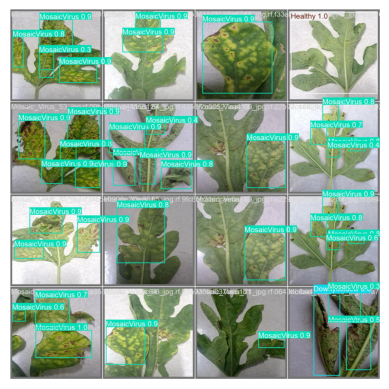

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/val_batch2_pred.jpg')
plt.imshow(img)
plt.axis('off')


In [19]:
from ultralytics import YOLO

def predict_on_test(model_path, test_image_dir):
    model = YOLO(model_path)
    model.predict(
        source=test_image_dir,
        conf=0.25,
        save=True,
        save_conf=True
    )
predict_on_test(
    model_path='/content/runs/detect/train/weights/best.pt',
    test_image_dir='/content/dataset_split/test/images'
)



image 1/77 /content/dataset_split/test/images/Anthracnose_10_jpg.rf.fe3709c143db136b72ae05add5ce9fcf.jpg: 640x640 1 Anthracnose, 10.2ms
image 2/77 /content/dataset_split/test/images/Anthracnose_20_jpg.rf.a72ae9fb11f54018b0b87287a94c5425.jpg: 640x640 1 Anthracnose, 8.2ms
image 3/77 /content/dataset_split/test/images/Anthracnose_20_jpg.rf.f3de8efae253587f0ab6a805f87db919.jpg: 640x640 1 Anthracnose, 12.1ms
image 4/77 /content/dataset_split/test/images/Anthracnose_22_jpg.rf.58241107295e84c409d980ce6398a542.jpg: 640x640 1 Anthracnose, 9.1ms
image 5/77 /content/dataset_split/test/images/Anthracnose_23_jpg.rf.fe3357e901f5072cb0085d8cfa95477a.jpg: 640x640 1 Anthracnose, 8.6ms
image 6/77 /content/dataset_split/test/images/Anthracnose_27_jpg.rf.6a3b135e92d467a2a39d445958144122.jpg: 640x640 1 Anthracnose, 7.6ms
image 7/77 /content/dataset_split/test/images/Anthracnose_2_jpg.rf.e7e5a530f820b5fa2eb5bfb2ed5c7c21.jpg: 640x640 1 Anthracnose, 7.4ms
image 8/77 /content/dataset_split/test/images/Anthrac

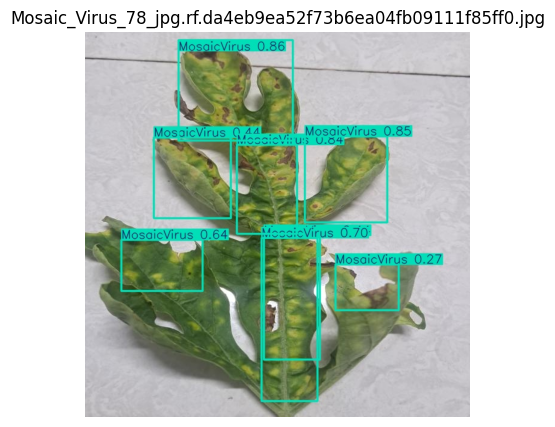

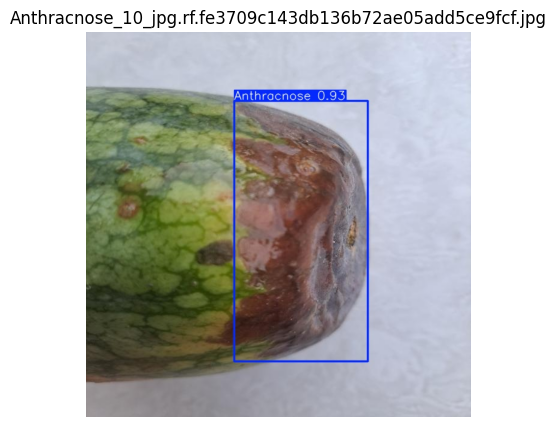

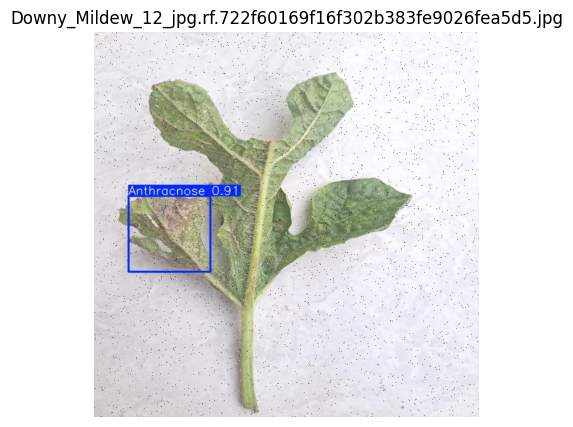

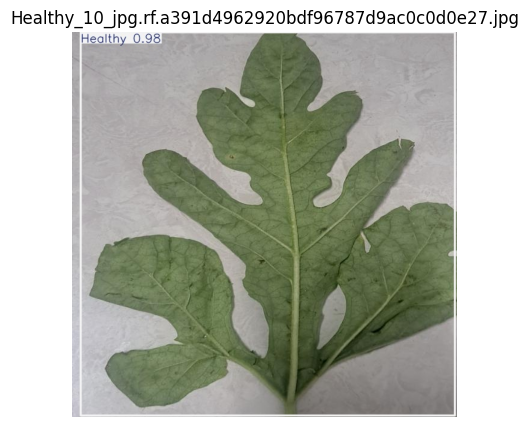

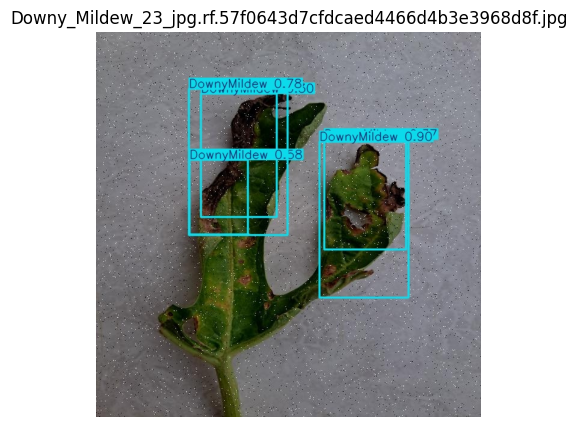

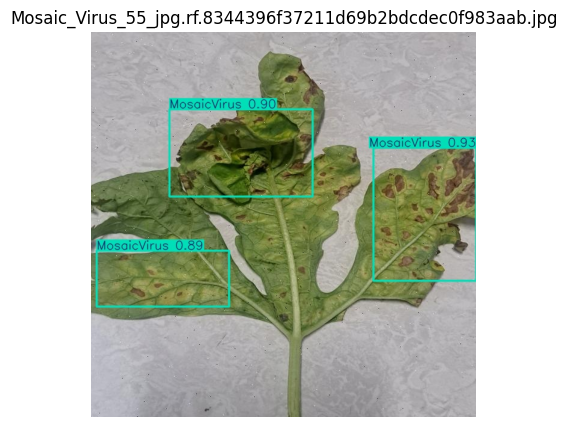

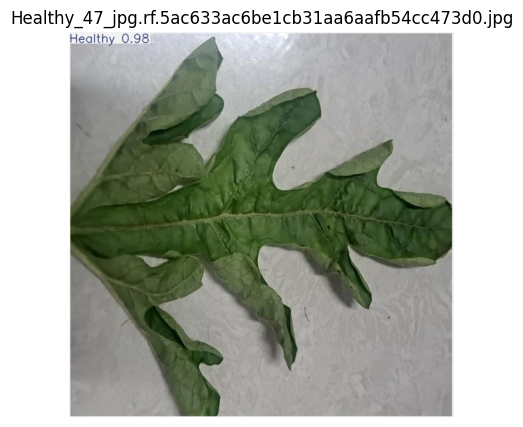

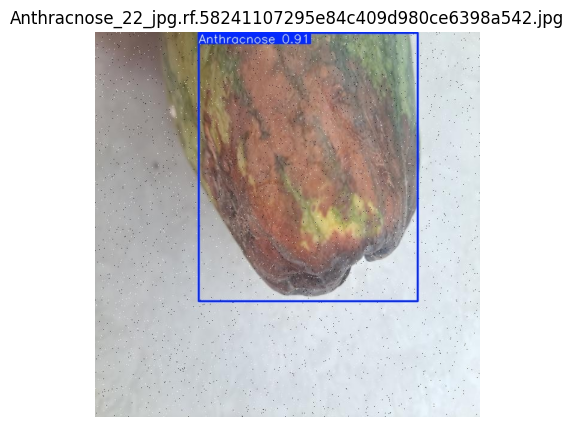

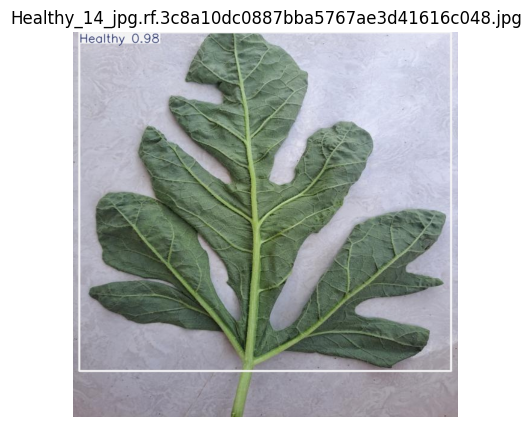

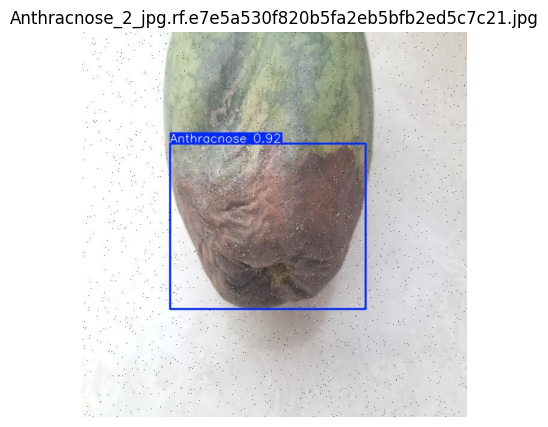

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def show_test_predictions(n=5):
    pred_dir = '/content/runs/detect/predict'
    imgs = [f for f in os.listdir(pred_dir) if f.endswith('.jpg')]

    for img_name in imgs[:n]:
        img = Image.open(os.path.join(pred_dir, img_name))
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')
        plt.show()
show_test_predictions(10)
